In [ ]:
import pandas as pd

In [ ]:
import math
import operator
math.sqrt(operator.add(4,5))

In [ ]:
from datascience import *

the above datascience module can be found in the following link 
https://github.com/data-8/datascience 

In [ ]:
path_data = 'data/'
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [ ]:
np.set_printoptions(threshold=50)

In [ ]:
cones = Table.read_table(path_data + 'cones.csv')

In [ ]:
cones

## show
the table method `show` can be used to show only some rows 

In [ ]:
cones.show(2)

## Select
to chose some columns

In [ ]:
cones.select('Flavor')

In [ ]:
cones.select('Flavor', 'Price')

## drop

In [ ]:
no_color = cones.drop('Color')
no_color

## sorting

In [ ]:
cones.sort('Price')

In [ ]:
cones.sort('Price', descending=True)

## where

In [ ]:
cones.where('Flavor', 'chocolate')

## NBA salary data

In [ ]:
nba = Table.read_table(path_data+'nba_salaries.csv').relabeled(3, 'SALARY')

In [ ]:
nba

In [ ]:
hawks = nba.where('TEAM', 'Atlanta Hawks')
hawks

## show

it will show the entire file

In [ ]:
hawks.show()

let us see who gets the most salary

In [ ]:
nba.sort('SALARY', descending=True)

In [ ]:
nba.where('SALARY', are.above(22))

In [ ]:
nba.where(nba.column('SALARY') > 23)

## String methods

In [ ]:
"hello".upper()

In [ ]:
"abdul baqi".replace('baqi', 'aziz')

## Array

In [ ]:
pos = make_array("verb", 'noun', 'adjective', 'pronoun', 'adverb')

In [ ]:
pos

In [ ]:
baseline_high = 14.48
highs = make_array(baseline_high - 0.880, 
                   baseline_high - 0.093,
                   baseline_high + 0.105, 
                   baseline_high + 0.684)
highs

In [ ]:
(9/5) * highs + 32

## array functions

In [ ]:
highs.size

In [ ]:
highs.sum()

In [ ]:
highs.mean()

## NP array functions

the diff function computes the difference between each adjacent pair of elements in an array. The first element of the diff is the second element minus the first.

In [ ]:
np.diff(highs)

In [ ]:
np.prod(highs)

In [ ]:
np.sum(highs)

check many useful `np` functions in this page:
https://docs.microsoft.com/en-us/learn/modules/introduction-python-using-datascience-library/12-sequences 

## Ranges

In [ ]:
np.arange(10)

In [ ]:
np.arange(70, 100)

In [ ]:
#with steps
np.arange(1,10,2)

## Back to Tables

The with_columns method on a table constructs a new table with additional labeled columns. Each column of a table is an array. To add one new column to a table, call with_columns with a label and an array. (The with_column method can be used with the same effect.)

In [ ]:
Table().with_columns('Number of petals', make_array(8,43,9))

In [ ]:
flowers = Table().with_columns(
    'Number of petals', make_array(8, 34, 5),
    'Name', make_array('lotus', 'sunflower', 'rose')
)

flowers.with_columns(
    'Color', make_array('pink', 'yellow', 'red')
)

In [ ]:
minard = Table.read_table(path_data+'minard.csv')
minard

## table properties

In [ ]:
minard.num_columns

In [ ]:
minard.num_rows

In [ ]:
minard.labels

In [ ]:
minard.relabeled('City', 'City name')

In [ ]:
minard

to access data in column

In [ ]:
minard.column('Survivors')

In [ ]:
minard.column(3)

In [ ]:
minard.column(1).item(3)

Because columns are arrays, we can use array operations on them to discover new information. For example, we can create a new column that contains the percent of all survivors at each city after Smolensk.

In [ ]:
initial = minard.column('Survivors').item(0)
minard = minard.with_columns('% surviving', minard.column('Survivors')/initial)
minard

In [ ]:
minard.set_format('% surviving', PercentFormatter)

## select columns

In [ ]:
minard.select(0,1)

In [ ]:
minard.drop(2,4)

In [ ]:
nba

In [ ]:
nba.sort('SALARY', descending=True).select(0).show(20)

## Take

In [ ]:
nba.take(2)

In [ ]:
nba.take(range(3,9))

In [ ]:
nba.sort(3, descending=True).take(range(5))

In [ ]:
nba.where('TEAM', are.equal_to('Golden State Warriors')).show()

In [ ]:
nba.where('TEAM', 'Denver Nuggets') # equivalent to nba.where('Team', are.equal_to('Denver Nuggets'))

In [ ]:
nba.where('POSITION', 'C').where('SALARY', are.above(10)).show()

In [ ]:
nba.where('TEAM', are.containing('Warriors')).show()

## reading data from online

In [ ]:
# As of Jan 2017, this census file is online here: 
data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'

# A local copy can be accessed here in case census.gov moves the file:
# data = path_data + 'nc-est2015-agesex-res.csv'

full_census_table = Table.read_table(data)
full_census_table

in the above table, let us create a new column to record the percentage change in population between 2010 and 2015.

In [ ]:
#first create a smaller table
partial_table = full_census_table.select('SEX','AGE','POPESTIMATE2010', 'POPESTIMATE2015')
# partial_table

#RENAME
partial_table = partial_table.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2015', '2015')
# partial_table
# now let us see the change
change = partial_table.column('2015')- partial_table.column('2010')

#now add to the file
us_pop = partial_table.with_columns('change',change,
    'percent change', change/partial_table.column('2010'))
us_pop.set_format('percent change', PercentFormatter)
us_pop

In [ ]:
# let us see infants who are 0 years old
us_pop

In [ ]:
us_pop_2015 = us_pop.drop('2010', 'change', 'percent change')
us_pop_2015

In [ ]:
infants = us_pop_2015.where('AGE', 0)
infants

In [ ]:
tot_infants = infants.column('2015').item(0)
infants.with_columns('percent', infants.column('2015')/tot_infants).set_format('percent',PercentFormatter)

Let us find all female, and then male who are not age 999 group

In [ ]:
female = us_pop_2015.where('SEX', 2).where('AGE', are.not_equal_to(999))
males = us_pop_2015.where('SEX', 1).where('AGE', are.not_equal_to(999))

now we will create a new Table with the ratio of the female to male

In [ ]:
males

In [ ]:
female

In [ ]:
males

In [ ]:
ratio = Table().with_columns(
    'AGE', female.column('AGE'),
    'RATIO', female.column('2015')/males.column('2015')
)
ratio

In [ ]:
ratio.where('AGE', are.above(70))

In [ ]:
ratio.plot('AGE')

## Apply method to a column

In [ ]:
#let us create a table
sample = Table().with_columns(
    'Persons', make_array('a','b', 'c','d','e'),
    'Age', make_array(23,45,12,3,117)
)
sample

In [ ]:
#let us define a function 
def cut_off_at_100(x):
    """ return the smaller x or 100 """
    return min(x,100)

In [ ]:
sample.apply(cut_off_at_100, 'Age')

## Prediction - the Galton Data

In [ ]:
# Galton's data on heights of parents and their adult children
galton = Table.read_table(path_data + 'galton.csv')
galton

In [ ]:
#let us take only two columns: the midparent height and the child height
heights = galton.select(3,7).relabeled(0,'MidParent').relabeled(1,'child')
heights

In [ ]:
heights.scatter(0)

let us try to predict the height of a child for a midparent height of 68. So let us take the range of 67.5 to 68.5 slice 

in that strip we took the average of heights of children and found out that the average is 66.24 inch. 

In [ ]:
heights.scatter('MidParent')
_ = plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
_ = plots.scatter(68, 66.24, color='gold', s=40)

so, first let us find all the points in this strip of 67.5 and 68.5

In [ ]:
close_to_68 = heights.where('MidParent', are.between(67.5,68.5))
close_to_68

In [ ]:
#now find the mean of the `child` column
close_to_68.column(1).mean()

let us encapsulate that into a function

In [ ]:
def predict_child(mpht):
    """Predict the height of a child whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children whose midparent height is
    in the range mpht plus or minus 0.5.
    """
    
    close_points = heights.where('MidParent', are.between(mpht-0.5, mpht + 0.5))
    return close_points.column('child').mean()

In [ ]:
#test the function
predict_child(68)

In [ ]:
#let us apply this function on each midparent height
heights.apply(predict_child, 'MidParent')

In [ ]:
#finally we can establish a table like the following
heights_with_predictions = heights.with_columns(
    "Prediction", heights.apply(predict_child, 'MidParent')
)
heights_with_predictions

In [ ]:
#now let us draw the scatter plot
heights_with_predictions.scatter('MidParent')

## Grouping

In [ ]:
#let us create a new table
cones = Table().with_columns(
    "Flavor", make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate'),
    "Price", make_array(3.55, 4.75, 6.55, 5.25,5.25)
)
cones 

In [ ]:
cones.group('Flavor')

as you can see, the default grouping does the count, but we can be explicit by adding a intended function as the second argument, let us see examples. 

In [ ]:
cones.group('Flavor', sum)

In [ ]:
#let us try max function
cones.group('Flavor', max)

## NBA Salary
let us apply the concept to the NBA dataset

In [97]:
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [99]:
# let us group by teams and sum the salary
nba.group('TEAM', sum)

TEAM,PLAYER sum,POSITION sum,SALARY sum
Atlanta Hawks,,,69.5731
Boston Celtics,,,50.2855
Brooklyn Nets,,,57.307
Charlotte Hornets,,,84.1024
Chicago Bulls,,,78.8209
Cleveland Cavaliers,,,102.312
Dallas Mavericks,,,65.7626
Denver Nuggets,,,62.4294
Detroit Pistons,,,42.2118
Golden State Warriors,,,94.0851


In [100]:
# no of players by position
nba.group('POSITION')

POSITION,count
C,69
PF,85
PG,85
SF,82
SG,96


In [102]:
#average salary per position
nba.select('POSITION', 'SALARY').group('POSITION', np.mean)

POSITION,SALARY mean
C,6.08291
PF,4.95134
PG,5.16549
SF,5.53267
SG,3.9882


In [104]:
#we can do grouping on two items as well
nba.group(['POSITION', 'TEAM'], sum)

POSITION,TEAM,PLAYER sum,SALARY sum
C,Atlanta Hawks,,22.7563
C,Boston Celtics,,7.3514
C,Brooklyn Nets,,1.3629
C,Charlotte Hornets,,20.3167
C,Chicago Bulls,,20.8488
C,Cleveland Cavaliers,,31.0094
C,Dallas Mavericks,,6.47096
C,Denver Nuggets,,10.4652
C,Detroit Pistons,,12.2721
C,Golden State Warriors,,19.6237


## Pivot

In [110]:
nba.pivot('POSITION', 'TEAM', values='SALARY', collect=sum)

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,22.7563,22.005,9.7634,6,9.04846
Boston Celtics,7.3514,6.17096,19.8986,8.83432,8.03022
Brooklyn Nets,1.3629,13.3575,7.8,26.0806,8.70589
Charlotte Hornets,20.3167,14.0573,17.9412,7.53284,24.2543
Chicago Bulls,20.8488,6.93489,22.3431,3.91632,24.7779
Cleveland Cavaliers,31.0094,19.689,19.6548,22.9705,8.98876
Dallas Mavericks,6.47096,23.827,17.6727,15.3615,2.43035
Denver Nuggets,10.4652,14.05,7.44724,28.7831,1.6839
Detroit Pistons,12.2721,0,13.913,6.86486,9.16176
Golden State Warriors,19.6237,21.5591,16.9145,17.9868,18.001


## Example: Education in California

In [112]:
full_table = Table.read_table(path_data + 'educ_inc.csv')
ca_2014 = full_table.where('Year', are.equal_to('1/1/14 0:00')).where('Age', are.not_equal_to('00 to 17'))
ca_2014


Year,Age,Gender,Educational Attainment,Personal Income,Population Count
1/1/14 0:00,18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
1/1/14 0:00,65 to 80+,Male,No high school diploma,"H: 75,000 and over",2153
1/1/14 0:00,65 to 80+,Female,No high school diploma,"G: 50,000 to 74,999",4666
1/1/14 0:00,65 to 80+,Female,High school or equivalent,"H: 75,000 and over",7122
1/1/14 0:00,65 to 80+,Female,No high school diploma,"F: 35,000 to 49,999",7261
1/1/14 0:00,65 to 80+,Male,No high school diploma,"G: 50,000 to 74,999",8569
1/1/14 0:00,18 to 64,Female,No high school diploma,"G: 50,000 to 74,999",14635
1/1/14 0:00,65 to 80+,Male,No high school diploma,"F: 35,000 to 49,999",15212
1/1/14 0:00,65 to 80+,Male,"College, less than 4-yr degree","B: 5,000 to 9,999",15423
1/1/14 0:00,65 to 80+,Female,Bachelor's degree or higher,"A: 0 to 4,999",15459


In [113]:
#let us take a subset
educ_inc = ca_2014.select('Educational Attainment', 'Personal Income', 'Population Count')
educ_inc

Educational Attainment,Personal Income,Population Count
No high school diploma,"H: 75,000 and over",2058
No high school diploma,"H: 75,000 and over",2153
No high school diploma,"G: 50,000 to 74,999",4666
High school or equivalent,"H: 75,000 and over",7122
No high school diploma,"F: 35,000 to 49,999",7261
No high school diploma,"G: 50,000 to 74,999",8569
No high school diploma,"G: 50,000 to 74,999",14635
No high school diploma,"F: 35,000 to 49,999",15212
"College, less than 4-yr degree","B: 5,000 to 9,999",15423
Bachelor's degree or higher,"A: 0 to 4,999",15459


In [120]:
education = educ_inc.group(0,sum)
education

Educational Attainment,Personal Income sum,Population Count sum
Bachelor's degree or higher,,8525698
"College, less than 4-yr degree",,7775497
High school or equivalent,,6294141
No high school diploma,,4258277


In [121]:
(education.column(2)/sum(education.column(2)))*100

array([31.74879298, 28.95512421, 23.43871195, 15.85737085])

In [124]:
# let us formulate hte above logic as a function
def percents (array_x):
    """ return the percent of each row of an array to its sum """
    return np.round((array_x/sum(array_x))*100,2)

In [125]:
education.with_columns("population %", percents(education.column(2)))

Educational Attainment,Personal Income sum,Population Count sum,population %
Bachelor's degree or higher,,8525698,31.75
"College, less than 4-yr degree",,7775497,28.96
High school or equivalent,,6294141,23.44
No high school diploma,,4258277,15.86


In [126]:
totals = educ_inc.pivot('Educational Attainment', 'Personal Income', values='Population Count', collect=sum)
totals

Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",575491,985011,1161873,1204529
"B: 5,000 to 9,999",326020,810641,626499,597039
"C: 10,000 to 14,999",452449,798596,692661,664607
"D: 15,000 to 24,999",773684,1345257,1252377,875498
"E: 25,000 to 34,999",693884,1091642,929218,464564
"F: 35,000 to 49,999",1122791,1112421,782804,260579
"G: 50,000 to 74,999",1594681,883826,525517,132516
"H: 75,000 and over",2986698,748103,323192,58945


In [127]:
distributions = totals.select(0).with_columns(
    "Bachelor's degree or higher", percents(totals.column(1)),
    'College, less than 4-yr degree', percents(totals.column(2)),
    'High school or equivalent', percents(totals.column(3)),
    'No high school diploma', percents(totals.column(4))   
    )

distributions

Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",6.75,12.67,18.46,28.29
"B: 5,000 to 9,999",3.82,10.43,9.95,14.02
"C: 10,000 to 14,999",5.31,10.27,11,15.61
"D: 15,000 to 24,999",9.07,17.3,19.9,20.56
"E: 25,000 to 34,999",8.14,14.04,14.76,10.91
"F: 35,000 to 49,999",13.17,14.31,12.44,6.12
"G: 50,000 to 74,999",18.7,11.37,8.35,3.11
"H: 75,000 and over",35.03,9.62,5.13,1.38


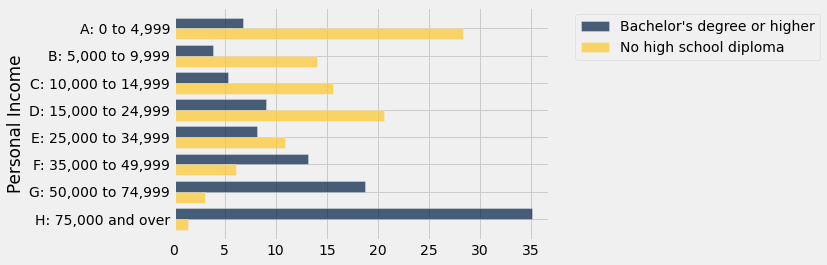

In [128]:
distributions.select(0, 1, 4).barh(0)